In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
import random
from keras.utils import img_to_array,to_categorical
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
import tensorflow as tf
import numpy as np

In [ ]:
vehicle_path=("/content/drive/MyDrive/Vehicle Images Dataset/data/vehicles")
non_vehicle_path=("/content/drive/MyDrive/Vehicle Images Dataset/data/non-vehicles")
vehicle_img = len(os.listdir(vehicle_path))
non_vehicle_img= len(os.listdir(non_vehicle_path))
v_img = os.listdir(vehicle_path)
nv_img = os.listdir(non_vehicle_path)

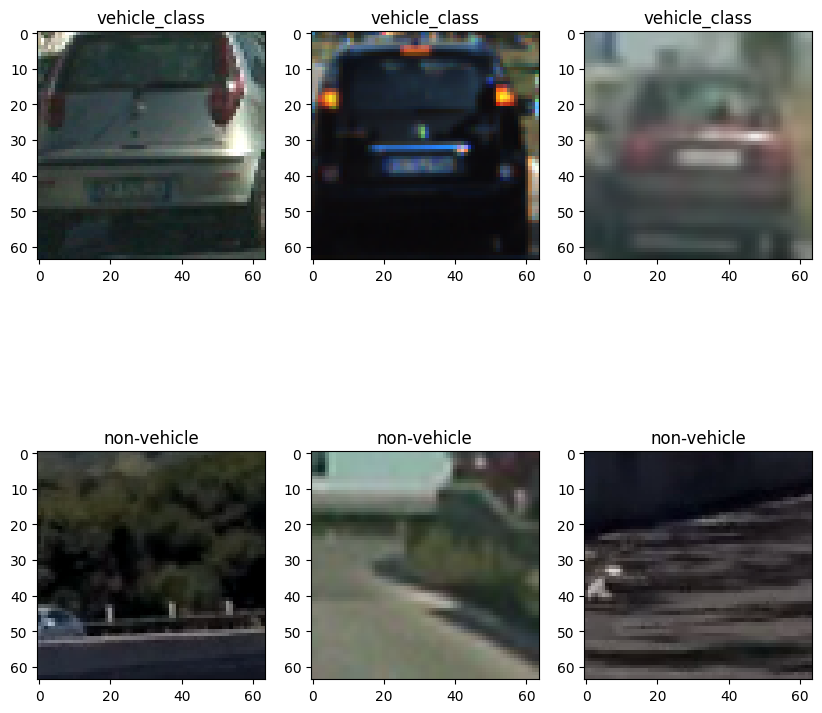

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(10,10))
ax=ax.ravel()
m = 0
for i in range(3):
  img=plt.imread(vehicle_path+"/"+ np.random.choice(os.listdir(vehicle_path)))
  ax[m].imshow(img)
  ax[m].set_title("vehicle_class")
  m+=1

for j in range(3):
  img=plt.imread(non_vehicle_path+"/"+ np.random.choice(os.listdir(non_vehicle_path)))
  ax[m].imshow(img)
  ax[m].set_title("non-vehicle")
  m+=1

In [ ]:
def convert_image_array(image):
  try:
    img=cv2.imread(image)
    if img is not None:
      img=cv2.resize(img,(64,64))
      return img_to_array(img)
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)

In [ ]:
image = cv2.imread(os.path.join(vehicle_path,v_img[3]))
image_arr=img_to_array(image)
image_arr.shape

(64, 64, 3)

In [ ]:
img_list=[]
img_label = []
all_v_image = os.listdir(vehicle_path)
for i in all_v_image:
    img_list.append(convert_image_array(os.path.join(vehicle_path,i)))
    img_label.append(0)

In [ ]:
all_nv_image = os.listdir(non_vehicle_path)
for i in all_nv_image:
    img_list.append(convert_image_array(os.path.join(non_vehicle_path,i)))
    img_label.append(1)

In [ ]:
img_list

[array([[[ 18.,  18.,  23.],
         [ 22.,  22.,  24.],
         [ 23.,  37.,  28.],
         ...,
         [ 12.,  12.,  11.],
         [ 13.,  11.,  11.],
         [ 12.,  11.,  11.]],
 
        [[ 21.,  26.,  24.],
         [ 25.,  33.,  25.],
         [ 25.,  29.,  28.],
         ...,
         [ 12.,  11.,  11.],
         [ 13.,  11.,  12.],
         [ 12.,  12.,  13.]],
 
        [[ 23.,  37.,  35.],
         [ 26.,  37.,  39.],
         [ 26.,  31.,  30.],
         ...,
         [ 13.,  12.,  11.],
         [ 13.,  13.,  12.],
         [ 13.,  15.,  14.]],
 
        ...,
 
        [[ 56.,  53.,  36.],
         [ 90., 114., 114.],
         [133., 152., 156.],
         ...,
         [ 88.,  72.,  54.],
         [ 88.,  75.,  61.],
         [ 84.,  73.,  60.]],
 
        [[ 59.,  50.,  36.],
         [ 87., 107., 109.],
         [123., 143., 153.],
         ...,
         [ 87.,  73.,  60.],
         [ 86.,  75.,  66.],
         [ 76.,  73.,  65.]],
 
        [[ 55.,  48.,  32.],
 

In [ ]:
img_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
image_nor = np.array(img_list,dtype=np.float16)/255.0

In [ ]:
image_nor = image_nor.reshape(-1,64,64,3)

In [ ]:
image_nor.shape

(17760, 64, 64, 3)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(image_nor,img_label,random_state=0)

In [ ]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [ ]:
model = Sequential()
model.add(Conv2D(50,(5,5),padding='same',input_shape=(64,64,3),activation="relu"))
model.add(Conv2D(20,(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 50)        3800      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 20)        25020     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 20)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 18000)             0         
                                                                 
 dense (Dense)               (None, 100)               1800100   
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                        

In [ ]:
if tf.config.experimental.list_physical_devices('GPU'):
    model = tf.distribute.MirroredStrategy().scope().experimental_run_v2(lambda: model)

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
hist =model.fit(xtrain,ytrain,batch_size=32,epochs=3,validation_data=(xtest,ytest))

Epoch 1/3
417/417 [==============================] - 494s 1s/step - loss: 0.1257 - accuracy: 0.9551 - val_loss: 0.1008 - val_accuracy: 0.9694
Epoch 2/3
417/417 [==============================] - 489s 1s/step - loss: 0.0799 - accuracy: 0.9718 - val_loss: 0.0755 - val_accuracy: 0.9705
Epoch 3/3
417/417 [==============================] - 482s 1s/step - loss: 0.0564 - accuracy: 0.9795 - val_loss: 0.0524 - val_accuracy: 0.9797


In [ ]:
model.save_weights("action.h5")

In [ ]:
pred = model.predict(xtest)

139/139 [==============================] - 37s 263ms/step


In [ ]:
ytest

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
pred

array([[9.9999744e-01, 2.5267441e-06],
       [9.8708344e-01, 1.2916545e-02],
       [1.4374595e-03, 9.9856246e-01],
       ...,
       [2.5540383e-03, 9.9744594e-01],
       [7.3428786e-01, 2.6571202e-01],
       [2.4173225e-03, 9.9758267e-01]], dtype=float32)

In [ ]:
# Convert predicted probabilities to class labels
pred_labels = np.argmax(pred, axis=1)

# Convert 'y_test' to class labels
true_labels = np.argmax(ytest, axis=1)

# Calculate accuracy
accuracy = np.mean(pred_labels == true_labels)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9797297297297297
